In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy import random as rdm
from scipy.optimize import differential_evolution as DE
import warnings
from scipy import stats as st
from scipy.stats import norm
import seaborn as sns
import time,math 
from pyswarm import pso 

___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.carrerasenlinea.mx/logos/original/logo-instituto-tecnologico-y-de-estudios-superiores-de-occidente.png" width="150px" height="100px" />



# <font color= paletvioletred > Difusiones con saltos</font>


### Integrantes: 
- <Strong> Carlos Alejandro Gutiérrez Sandoval </Strong> 


- <Strong> Jazmín Calderón Erape </Strong>

#### 30 de noviembre 2018


___
### <Strong> <font color = skyblue> I. Motivación del proyecto </Strong>

> <p style='text-align: justify;'>En la valuación de productos derivados, el supuesto de que la variable subyacente sigue una distribución lognormal, o que su tasa de crecimiento sigue una distribución normal, es muy común. En particular, es usual suponer que las variables financieras siguen un movimiento browniano geommétrico. Sin embargo, existe evidencia empirica de que la mayoria de las variables financieras, incluyendo el precio de diversos activos, no se comportan de acuerdo con una distribución lognormal. Por ejemplo, las distribuciones empiricas de los rendimientos diarios de varios de los titulos que cotizan en el mercado mexicano de capitales presentan, en general sesgo y exceso de curtosis, y no siempre es posible ajustar una distribución teorica simple. Una de las principales características que distingue a los mercados financieros es que ocasionalmente se presentan movimientos inesperados (auges o caídas). Estos movimientos ocurren con mayor frecuencia de lo que se esperaría bajo el supuesto de una distribución lognormal, incluso con una volatilidad razonablemente moderada. Por lo anteriormente mencionado en este trabajo estamos particularmente interesados en estudiar subyacentes que pueden ser descritos con una mezcla de una variable lognormal con un proceso de poissson. 


### <Strong> <font color = skyblue> I.b Problema </Strong>

> <p style='text-align: justify;'>El modelo Black-Scholes no representa la realidad del mercado de forma perfecta. 

___
### <Strong> <font color = skyblue> II. Objetivos generales </Strong>

- Realizar la metodología del proceso de difusión con saltos
- Replicación del algoritmo propuesto en "Jump-Diffusion Calibration using Differential Evolution" sobre una serie de tiempo sintética
- Estimación paramétrica 
- Aplicación del módelo de difusión con saltos para los precios del petroleo West Texas Intemediate (WTI) 


___
### <Strong> <font color = skyblue> III. Proceso de Poisson </Strong>

Un proceso de poisson $N = N_t \in \mathbb Z_+,\forall t:[0,T]$ tiene intensidad $\lambda$ y cumple con las siguientes propiedades:

- $N_0 = 0$
- $N_t - N_0 $ Sigue una distribución de poison: $P(N_t - N_0 = n) = e^{-\lambda t}\frac {\lambda t^n}{n!}$
- $N_t-N_s$ y $N_u-N_v$ son independientes si $(s,t) \cap (u,v) \ne 0$
- $N_{t+s}-N_s = N_t, \forall \, t,s > 0$ tiene incrementos estacionarios y en consecuencia $E[N_t] =Var(N_t)= \lambda t$

<p style="text-align:justify">
El proceso de poisson compensado $\hat N_t = N_t - \lambda t$ es una martingala y $E[\hat N_t] =Var(\hat N_t)= 0$ este hecho facilitará la estimación de los parámetros del proceso de difusión con salto ya que la media y la varianza de $\hat N_t$ no se mezclan con la tendencía ni la difusión del proceso completo.

Generador del Proceso $\mathcal{l}(y)$:

$$\mathcal{L}_t^Yl(y) = \mathcal f_t \partial _y l(y) + \frac 12g_t^2 \partial _{yy}l(y) + \lambda([l(y +  h_t) - l(y)] - h_t\partial _y l(y))$$

donde,
$Y_t = \int_0^t f_sds+\int_0^t g_sdW_s+\int_0^t h_{s^-} d\hat N_s$ es el proceso de difusión con salto

Tomando la solución general, $l(y)=Y_t$ simplica el generador a:

$$\mathcal{L}_t^YY = \mathcal f_t \partial _y + \frac 12g_t^2 \partial _{yy} + \lambda([Y +  h_t - Y] - h_t\partial _y)$$

El generador provee valiosa información del proceso estocástico. Indica el cambio esperado del proceso, formalmente como:

$$\mathcal L f(x) = \lim_{x \rightarrow 0} \frac {E^x[f(X_{t+h})]-f(x)} {h}$$

___
### <Strong> <font color = skyblue> IV. Modelo de difusión con saltos </Strong>

> <p style='text-align: justify;'> El modelo de difusión con saltos se puede definir como:

$$dX(t) = X(t)(u \thinspace dt + \sigma \thinspace dW(t) + J(t)dP(t))  \hspace{4cm}(1)$$

<p style='text-align: justify;'>donde  $X(t)$ es el proceso que desribe el precio de un activo financiero con $P (X(0)>0)=1$, $u \in R$ es el valor esperado instantáneo del precio, $\sigma$ es la varianza instantánea del precio y $W(t)$ es un proceso de Wiener estándar, $P_t$ es un proceso Poisson con intensidad constante $\lambda$ >0 y $J(t)$ es el proceso que genera el tamaño de salto, que junto con $P(t)$ forma un proceso de Poisson compuesto.

<p style='text-align: justify;'>La solución de (1) es

$$x(t) = X (0) exp ((u- \frac{\sigma^2}{2})t+ \sigma W(t) +  \sum_{k=1}^{p(t)} Q_k) \hspace{4cm}(2)$$

<p style='text-align: justify;'> Donde $Q_k$ está implícitamente definido de tal manera que $J(T_k)-1$,  $T_k$ siendo el momento en que el salto $k_{th}$ del poceso de poisson se produce; Si $P(t)=0$ la suma es cero por convención. Asumimos que $Q_k$ es una secuencia independiente e idénticamente normalmente distribuida con media $u_Q$ y varianza $\sigma^2_Q$.

<p style='text-align: justify;'>El registro de retorno de $X(t)$ durante un período de $\Delta t$ se define como $\Delta Y (t) = log X (t) = log X (t + \Delta t) - log X (t)$ y, desde $(2)$, su dinámica esta dada por

$$\Delta Y(t) = (u- \frac{\sigma^2}{2})\Delta t+ \sigma \Delta W(t) +  \sum_{k=1}^{\Delta p(t)}  Q_k \hspace{4cm}(3)$$

<p style='text-align: justify;'> Se puede mostrar que la distribución de $Y (t)$ es una mezcla infinita de distribuciones gaussianas lo que hace que la estimación sea intratable; Una versión simplificada asumiendo que si la tasa de ocurrencia de saltos es pequeña, entonces en un período de tiempo suficientemente corto, solo puede ocurrir un salto. En este caso, $\Delta P (t)$ puede ser aproximado por una variable aleatoria de Bernoulli para $\lambda \Delta t$ pequeña, y la densidad de $ \Delta Y (t)$ es

$$ f_{\Delta Y}(y) =(1 - \lambda \Delta t)\thinspace f_{\Delta D}(y) + \lambda \Delta t (f_{\Delta D} * f_Q)(y)\hspace{4cm}(4)$$

<p style='text-align: justify;'> Donde $f_{\Delta D}$ es la densidad de la parte de difusión y $f_Q$ es la densidad asumida por los saltos. La convolución esta definida como $(f_{\Delta D} * f_Q)(y) = \int_\infty^\infty f_{\Delta D }(u)f_Q(u-y)du$. La densidad de la convolución $f_{\Delta D} * f_Q$ es una densidad normal con media $ (u- \frac{\sigma^2}{2})\Delta t + u_Q$ y varianza $\sigma^2 \Delta t + \sigma^2_Q$. Para una serie de rendimientos lognormales observados $\Delta y_1,...\Delta y_T$, la probabilidad logarítmica de los parámetros del modelo $\theta = (\lambda,u,\sigma,u_Q,\sigma_Q)'$ es obtenida de manera directa de $(4)$ como

$$log \mathcal{L} (\theta \mid \Delta y_1 ..., \Delta y_T)   = \sum_{t=1}^T  log \thinspace  f_{\Delta Y} (\Delta y_t \mid \theta) \hspace{4cm}(5)$$

<p style='text-align: justify;'>y el estimador de máxima verosimilitud $ \hat \theta$ se obtiene maximizando $(5)$. 
Kiefer (1978) muestra que pueden existir varios mínimos locales en tal configuración de mezcla. La estimación del modelo es, por lo tanto, una tarea difícil y se requiere un optimizador global sólido como la Evolución diferencial.

___
### <Strong> <font color = skyblue> V. Evolución diferencial </Strong>

<img style="float: right; margin: 0px 0px 15px 15px;" src="http://s3-us-west-2.amazonaws.com/puntoapunto.com.ar/wp-content/uploads/sites/3/2017/08/08151037/inteligencia-artificial.jpg" width="400px" height="200px" />



<p style='text-align: justify;'> Evolución diferencial (DE por sus siglas en inglés) es una heurística de búsqueda introducida por Storn y Price (1997) y pertenece a la clase de algoritmos evolutivos. El algoritmo utiliza operaciones inspiradas en la biología de cruce, mutación y selección en una población para minimizar una función objetiva en el transcurso de generaciones sucesivas. 

___
### <Strong> <font color = skyblue> VI. Replicación del algoritmo propuesto en "Jump-Diffusion Calibration using Differential Evolution" sobre una serie de tiempo sintética</Strong>

<p style='text-align: justify;'> Para probar el modelo anteriormente expuesto se crea una serie de tiempo sintética y utilizando la metodología propuesta se intenta estimar los parámetros del proceso de difusión con salto de la serie sintética. Para crear la serie sintética utilizaremos un proceso de difusión con drift $\mu _1 dt + \sigma_1 dW$ y un proceso de poisson con intensidad $\lambda dt$ y tamaño de salto normal $\mu_2 dt + \sigma_2 dW$. Para generar los saltos de poisson utilizaremos la siguiente propiedad de la función de densidad poisson.

La distribución de poisson satisface la siguiente forma recursiva de su probabilidad
$$ p(k+1)={\lambda \over k+1}p(k)$$

$\forall k:k >0:$

$P(0) = \frac { e^{-\lambda}}{0!},$
$P(1) = \frac {\lambda^1 e^{-\lambda}}{1!} = \frac {\lambda e^{-\lambda}}{(1)0!},$
$P(2) = \frac {\lambda^2 e^{-\lambda}}{2!}= \frac { \lambda \lambda  e^{-\lambda}}{(2)(1)0!},$
$P(3) = \frac {\lambda^3 e^{-\lambda}}{3!}= \frac { \lambda \lambda \lambda  e^{-\lambda}}{(3)(2)(1)0!},$
$P(k) = \frac {\lambda^k e^{-\lambda}}{k!} =\frac{\lambda}{k}P(k-1)$

<p style='text-align: justify;'> Comenzaremos creando:
- Función de distribución de probabilidad de poisson 
- Función de distribución acumulada poisson

Esto con el objetivo de crear una función con un conjunto de numeros aleatorios para generar los saltos al igual que el tiempo en segundos antes del salto inminente

In [2]:
def poissonGen(mu):
    '''Generador de función de distribución de probabilidad poisson'''
    k = 0
    prev = np.exp(-mu)   
    while True:        
        yield(prev)    
        k +=1
        prev = mu*prev/k
def CumPoisson(mu):
    '''Generador de función de distribución acumulada poisson'''
    gen = poissonGen(mu)
    current = next(gen)
    while True:
        yield current
        current += next(gen)

In [3]:
def jump(x):
    jump = True
    generador = CumPoisson(x)    
    r = np.random.rand()
    while True:        
        if r < next(generador):            
            yield jump;
            r = np.random.rand()
            generador = CumPoisson(x)
        else:
            yield not jump

In [4]:
def instantes(est,n):    
    gen = jump(est)
    t =  0
    ts = []
    for i in range(n):
        while not next(gen):
            t +=1       
        ts.append(t)
        t=0
    return ts

In [5]:
print('Promedio muestral de tiempo medio antes de salto inminente',np.mean(instantes(5.4,1000)))

Promedio muestral de tiempo medio antes de salto inminente 5.533


#### Intervalos de confianza

<p style='text-align: justify;'> Con el fin de describir la variabilidad entre la medida obtenida anteriormente y la medida real del tiempo medio antes del salto inminente (el valor real) se realiza un intervalo de confianza del 99% .

In [6]:
muestra=[np.mean(instantes(5.4,1000)) for i in range(100)]
m = st.bayes_mvs(muestra,.99)[0]
print('Intervalo de confianza: {} < {} < {}'.format(m[1][0],m[0],m[1][1]))

Intervalo de confianza: 5.376925214316274 < 5.397939999999998 < 5.418954785683723


Las observaciones empleadas anteriormente tienen una media que corresponde con el parámetro $\lambda$ de una distribución poisson. La distribución de la muestras tambíen sugieren visualmente que la distribución es poisson con media 5.4.

#### Comparación de función creada con función de python

<p style='text-align: justify;'> Se grafica la distribución de poisson con la simulación de los saltos creada anteriormente, al igual que la funcion de distribución de poisson de python ambas con una $\lambda =5.4$ y un conjunto de 10,000 variables aleatorias

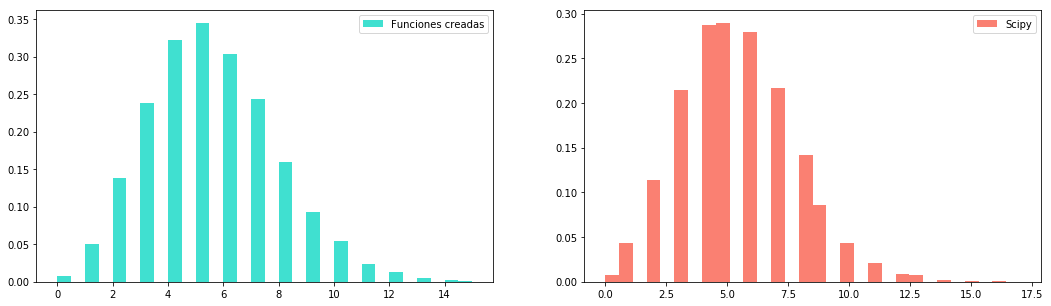

In [7]:
plt.figure(figsize=(18,5))
plt.subplot(121)
plt.hist(instantes(5.4,10000),bins=30,density=True,label='Funciones creadas', color='turquoise')
plt.legend()
plt.subplot(122)
plt.hist(st.poisson(5.4).rvs(10000),bins=30,density=True,label='Scipy', color='salmon')
plt.legend()
plt.show()

<p style='text-align: justify;'><Strong>Figura 1:</Strong> Comprobación de las funciones para crear el proceso de poisson y simular los saltos contra la distribucion de Scipy 

<p style='text-align: justify;'>En la figura 1 se puede ver que es casi identica la función de distribución creada con la de python, por lo que es confiable utilizar dicha función creada para este proyecto. También se puede concluir que hay mas probabilidad de ocurrir un salto entre 4 y 6 segundos. Con un valor λ de 5.4, se puede observar la típica forma de campana de Gauss, pudiendo a deducirse, que conforme aumenta λ, las variables de Poisson van a poder  aproximarse a la distribución
normal.

#### Serie de tiempo sintética

<p style='text-align: justify;'> Ahora se crea una serie de tiempo sintetica con distribución normal con parametros: $dt=1, u_1= 0.001,\sigma_1 = 0.02, u_2 = 0, \sigma_2 = 0.1, \lambda = 0.01$ para 500 periodos y un precio inicial de 
    $s_0 = 100$. Esto con el objetivo de observar el comportamiento de los saltos en un activo subyacente.

In [8]:
dt = 1
mu_1 = .001
s_1 = .02
mu_2 = 0
s_2 = .1
periodos = 500
lmbda = .01
s0 = 100

vars_ = {'dt' : dt,
'mu_1' : mu_1,
's_1' : s_1,
'mu_2' : mu_2,
's_2' : s_2,
'lmbda' : lmbda,
} 

In [9]:
N_1 = st.norm(mu_1,s_1*np.sqrt(dt))
N_2 = st.norm(mu_2,s_2)
jumps = jump(1/lmbda/dt)

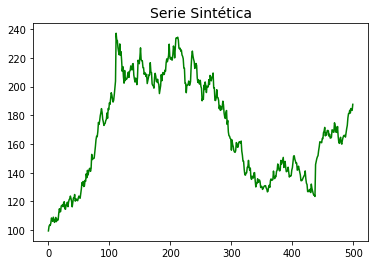

In [10]:
r = np.array([(N_1.rvs(1)+next(jumps)*N_2.rvs(1))[0] for i in range(periodos)])
plt.plot(s0*np.exp(r).cumprod(), color='green')
plt.title("Serie Sintética", fontsize = 14) 
plt.show()

<p style='text-align: justify;'><Strong>Figura 2: </Strong> Serie sintética con los parámetros anteriormente definidos

<p style='text-align: justify;'> En la figura 2 se puede observar el comportamiento en un determinado periodo de la serie sintética mediante el proceso de difusión con saltos. Es notable la presencia de los saltos desde el inicio de la serie mediante varios picos pudiendo representar caidas o subidas del precio de un activo. Por lo tanto dicha serie sintética presenta una forma mas real el comportamiento de riesgo de mercado que con el tradicional modelo no se podria apreciar. En el mundo real, estas series son muy comunes, por lo que tener conocimientos sobre como simularlas da una una ventaja. 

<p style='text-align: justify;'> Se define la función densidad como:

In [11]:
'lambda:0, mu:1, sigma:2, muq:3, sigmaq:4'
def density(theta,dy,dt):    
    mu1 = (theta[1] - theta[2]**2 / 2) * dt
    mu2 = mu1 + theta[3]
    sig1 = theta[2] * np.sqrt(dt)
    sig2 = np.sqrt(sig1**2 + theta[4]**2)
    pdf1 = norm.pdf(dy, mu1, sig1)
    pdf2 = norm.pdf(dy, mu2, sig2)    
    pdf = (1 - theta[0] * dt) * pdf1 + (theta[0] * dt) * pdf2
    return pdf

<p style='text-align: justify;'> Con el fin de encontrar el estimador de máxima verosimilitud, minimizamos el valor negativo de la función log-verosimilitud negativa (NLL por sus siglas en inglés) dada en (5). A continuación se crea la funcion NLL:

In [12]:
def negll(theta, dy, dt):    
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        L = density(theta, dy, dt)          
        nll = -sum(np.log(L))
        nll = 1e10 if np.isnan(nll) or np.isinf(nll) else nll
    return nll

<p style='text-align: justify;'>Límites para variables $(\lambda,u_1, \sigma_1, u_2, \sigma_2)$. Definiendo los límites inferior y superior para el argumento de la función de optimización. 

In [13]:
lims = [(0,1),(-1,1),(0,2),(-1,1),(0,2)]

#### Estimacíon de parámetros

<p style='text-align: justify;'> Se hace uso de los algoritmos evolutivos para optimizar la log-verosimilitud y encontrar los parámetros del modelo de difusión con saltos que se considera. Esto debido a su capacidad de encontrar el óptimo global en presencia de varios óptimos locales. Ya que es un problema que se presenta en la estimación estadística cuando existe multimodalidad de la función objetivo, como lo es la función log-verosimilitud. 

In [14]:
res = DE(negll,bounds=lims,args=(r,dt),tol=.005,popsize=500,mutation=(.6,.9),maxiter=2000)
lambda_,mu1,sigma1,mu2,sigma2 = res.x
print(lambda_,mu1,sigma1,mu2,sigma2)
vars_

0.00400122952756576 0.0008278432287039515 0.020044843237666622 0.15801757547187034 0.0


{'dt': 1, 'lmbda': 0.01, 'mu_1': 0.001, 'mu_2': 0, 's_1': 0.02, 's_2': 0.1}

___
### <Strong> <font color = skyblue> VI.b. Estimación paramétrica por evolución diferencial para difusión con drift puro, y para saltos Poisson </Strong>

Para seguir observando el comportamiento del algoritmo de optimización se prueba un movimiento browniano geométrico $dx = \mu dt + \sigma dW$ y un Proceso de Poisson $J_t$. Sea $J_t = \sum_{k=1}^{N_t}\epsilon_i, t \geq 0.$ un proceso de poisson compuesto donde $\epsilon$ es una variable aleatoria independiente e idénticamente distribuida con distribución $F$.

Comenzando con la difusión se tiene la siguiente serie sintética utilizando los mismos parámetros anteriormente expuestos para la simulación de proceso de difusión con salto.

>  Ahora se crea una serie de tiempo sintetica con distribución normal con parametros: $dt=1, u_1= 0.001,\sigma_1 = 0.02, u_2 = 0, \sigma_2 = 0.1, \lambda = 0.01$ para 500 periodos y un precio inicial de 
    $s_0 = 100$.

In [15]:
jumps = jump(1/lmbda/dt)

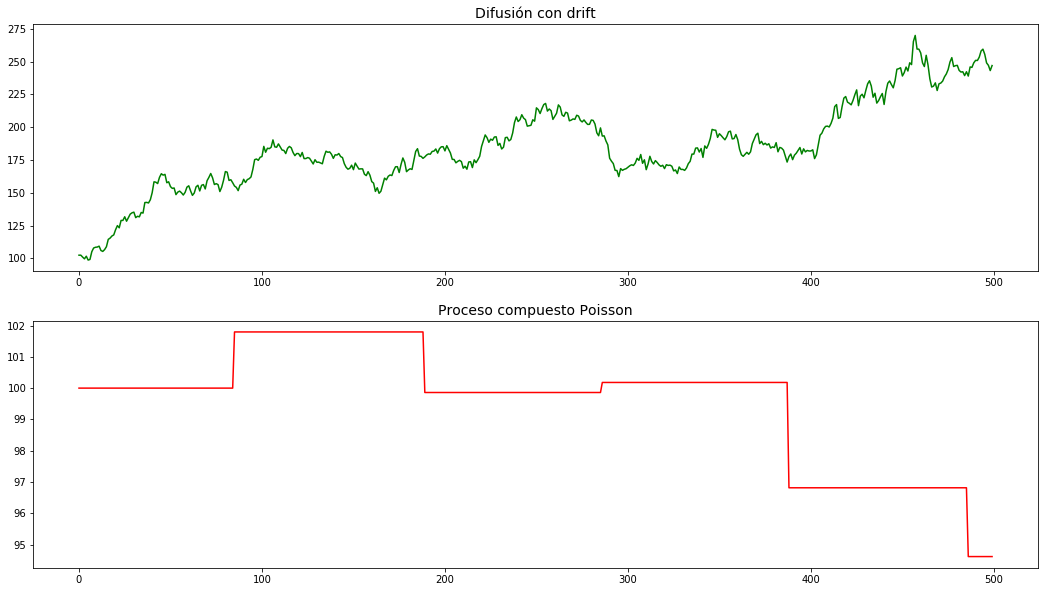

In [16]:
plt.figure(figsize=(18,10))
plt.subplot(211)
r1 = st.norm(mu_1,s_1*np.sqrt(dt)).rvs(periodos)
diff = s0*np.exp(r1.cumsum())
plt.plot(diff, color='green')
plt.title("Difusión con drift", fontsize = 14) 
plt.subplot(212)
r2 = np.array([(next(jumps)*st.norm(mu_1,s_1).rvs(1))[0] for i in range(periodos)])
J =s0*np.exp(r2.cumsum())
plt.plot(J, color='red')
plt.title("Proceso compuesto Poisson", fontsize = 14) 
plt.show()

<p style='text-align: justify;'><Strong>Figura 3:</Strong> Serie sintetica difusión con drif (arriba) y proceso compuesto poisson (abajo)

<p style='text-align: justify;'> En la figura de arriba se muestra el proceso de difusión tomando en cuenta que la serie tiene una tendencia a moverse (drift) con una distribución normal,con el objetivo de mostrar un enfoque cada vez mas realista de como se comportan los activos, asi mismo agregamos el comportamiento del proceso de pisson, donde se muestra el tamaño de los saltos asi como el intervalo de los tiempos. Cabe resaltar que esto último es de importancia debido a que representa el impacto del cambio del precio. Los saltos se producen aleatoriamente de acuerdo al proceso de Poisson, mientras que el valor del salto es una cantidad aleatoria.

Para el primer caso de la difusión, la función de densidad es la siguiente:

<p style='text-align: justify;'> Se define la función densidad como:

In [17]:
'mu:0, sigma:1'
def density(theta,dy,dt):    
    mu1 = (theta[0] - theta[1]**2 / 2) * dt    
    sig1 = theta[1] * np.sqrt(dt)    
    pdf1 = st.norm.pdf(dy, mu1, sig1)    
    pdf = pdf1
    return pdf

<p style='text-align: justify;'> la función previamente definida 'negll' es la misma dado que lo que cambia es cómo se define la función de densidad y no la maximización de la log-verosimilitud.

> def negll(theta, dy, dt):
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        L = density(theta, dy, dt)          
        nll = -sum(np.log(L))
        nll = 1e10 if np.isnan(nll) or np.isinf(nll) else nll
    return nll

<p style='text-align: justify;'>Límites para variables $(u_1, \sigma_1)$. Definiendo los límites inferior y superior para el argumento de la función de optimización. 

In [18]:
lims = [(-1,1),(0,2)]

#### Estimacíon de parámetros

In [19]:
res = DE(negll,bounds=lims,args=(r1,dt),tol=.005,popsize=500,mutation=(.6,.9),maxiter=2000)
mu1,sigma1 = res.x
print('mu_1',mu1,'s_1',sigma1)
vars_

mu_1 0.00201546127054192 s_1 0.020346990711293717


{'dt': 1, 'lmbda': 0.01, 'mu_1': 0.001, 'mu_2': 0, 's_1': 0.02, 's_2': 0.1}

Se aprecia en los resultados como el algoritmo encontró estimadores para el proceso de difusión con drift cercanos al real. Comparándolo con la solución analítica de estimadores de máxima verosimilitud:

In [20]:
print('mu',r1.mean(),'sigma',r1.std())

mu 0.001808466112467663 sigma 0.020346995775102565


Prosigue la estimación de parámetros para el proceso de poisson

In [21]:
'lambda:0'
def density(theta,dy,dt):                
    pdf  = st.poisson.pmf((dy!=0)^0,theta[0])
    return pdf

In [22]:
lims = [(0,2)]

In [23]:
res = DE(negll,bounds=lims,args=(r2,dt),tol=.001,popsize=500,mutation=(.6,.9),maxiter=2000)
lambda_ = res.x
print('lambda',lambda_)
vars_

lambda [0.01000002]


{'dt': 1, 'lmbda': 0.01, 'mu_1': 0.001, 'mu_2': 0, 's_1': 0.02, 's_2': 0.1}

In [24]:
a=np.array([0,0,1,1,0,0])

In [25]:
(np.diff(a)!=0)^0

array([0, 1, 0, 1, 0])

Para la distribución del tamaño de salto $\epsilon$

In [26]:
lims = [(-1,1),(0,2)]

In [27]:
'lambda:0, muq:1, sigmaq:2'
def density(theta,dy,dt):        
    mu2  = theta[0]    
    sig2 = theta[1]
    jumps = dy[dy != 0]
    n = len(jumps)
    pdf2 = norm.pdf(jumps, mu2, sig2)            
    return pdf2 

In [28]:
res = DE(negll,bounds=lims,args=(r2,dt),tol=.001,popsize=500,mutation=(.6,.9),maxiter=2000)
print('mu {} sigma {}'.format(*res.x))
vars_

mu -0.0110672144654572 sigma 0.01886000718897622


{'dt': 1, 'lmbda': 0.01, 'mu_1': 0.001, 'mu_2': 0, 's_1': 0.02, 's_2': 0.1}

___
### <Strong> <font color = skyblue> VI.c. DE VS PSO</Strong>

### <Strong> <font color = skyblue> Optimizaión por enjambre de particulas (PSO) </Strong>

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://camo.githubusercontent.com/e50bb8623642b14c1113b84561f7f60539f38eab/687474703a2f2f6b7572672e6f72672f6d656469612f70736f5f696c6c757374726174696f6e2e6a7067" width="400px" height="200px" />



<p style='text-align: justify;'> Se inspira en el comportamiento de los enjambres de insectos en la naturaleza o sociedades biológicas, donde los individuos comparten objetivos y presentan tanto comportamientos individuales como sociales.

<p style='text-align: justify;'>Idea:
Las soluciones tienen una posición en el espacio de búsqueda (el óptimo tiene una posición también). El objetivo es que las soluciones exploren el espacio de búsqueda para llegar al óptimo del problema.  No se sabe donde está el óptimo pero se sabe que tan lejos esta cada solución del óptimo.

In [29]:
lb=[0,-1,0,-1,0]
ub=[1,1,2,1,2]

In [ ]:
ngll_pso = []
for i in range(0,50): # itera desde 0 hasta 50
    res = pso(negll,lb,ub,args=(r,1))
    sl=res[1]
    ngll_pso.append(sl)
#print("resultados por pso:", ngll_pso)
    #iteraciones.append(res.nit)
    #ngll.append(res.fun)
#print("la lista almacenó los siguientes datos: ",iteraciones, ngll)

In [ ]:
#iteraciones = []
ngll_DE = []
for i in range(0,50): # itera desde 0 hasta 4
    res = DE(negll,bounds=lims,args=(r,1),tol=.01,popsize=300)
    #iteraciones.append(res.nit)
    ngll_DE.append(res.fun)
#print("la lista almacenó los siguientes datos: ",ngll_DE)
    

In [35]:
du = pd.read_excel('./proyec.xlsx')

<p style='text-align: justify;'>Para fines de comparación se utilizan dos metodos para encontrar el estimador de máxima verosimilitud, minimizamos el valor negativo de loglikelihood función (NLL) dada en (5). Se ejecuta la función DE de la librería scipy.optimize, al igual que la función de optimización pso de la librería pyswarm, en ambos metodos utilizamos los parámetros predeterminados .


<p style='text-align: justify;'>Ejecutamos la estimación 50 veces para todas las rutinas de optimización. El diagrama de violin de los valores NLL en el óptimo para los dos optimizadores se muestran en la Figura 5 donde se nota que DE es más estable en las carreras y siempre converge hacia el óptimo global. 


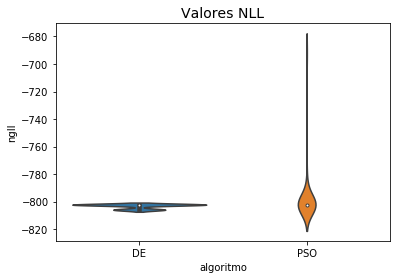

In [36]:
import warnings
warnings.simplefilter('ignore')
sns.violinplot(x='algoritmo', y='ngll', data=du)
plt.title("Valores NLL", fontsize = 14) 
#plt.grid(True)
plt.show()

<p style='text-align: justify;'><Strong>Figura 3:</Strong> Gráficas de violín de los 50 valores negativos de la función log-likehood (NLL) en el óptimo obtenido por DE y PSO. Para minimizar la función NLL el mejor método de optimización es por DE para los parametros del optimizador empleado. 

___
### <Strong> <font color = skyblue> VII. Aplicación del módelo de difusión con saltos para los precios del petroleo  West Texas Intemediate (WTI) </Strong>

<p style='text-align: justify;'>El WTI es una clase de petróleo bruto que los economistas utilizan como valor estándar para determinar el precio del petróleo bruto como materia prima en los mercados de intercambio, en el marco de contratos a largo plazo. Esta cotización se realiza en el New York Mercantile Exchange, que es la bolsa principal de las materias primas mundiales. Se cuentan a través del mundo tres grandes tipos de petróleo bruto que sirven de referencia al precio del petróleo en función de su zona de producción. Así pues, para el petróleo europeo,  el Brent del mar del Norte es el que sirve de referencia, mientras que para los países de la OPEP, el bruto de Dubaï es el que se privilegia para determinar los precios. Por consecuencia los precios del WTI son susceptibles a caidas o grandes subidas, por esta razón se eligieron sus precios para aplicar el modelo de difusión con saltos por un periodo que va del 9 octubre 2017 al 9 noviembre 2018

In [37]:
def fun2(string):
    split =string.split(" ")    
    return "{}/{}/{}".format(split[1][:-1],split[0],split[2])

In [38]:
df = pd.read_csv('WTI.csv',names=['Fecha','WTI'],
                 index_col=0,
                 usecols=[0,1],
                date_parser=fun2,dayfirst=True,skiprows=1).sort_index(ascending=True)

In [59]:
r=df.pct_change(1).iloc[1:,:]
s0 = df.iloc[-1,0]

#### Estimación de parametros a muestreo WTI Futures

In [60]:
'lambda:0, mu:1, sigma:2, muq:3, sigmaq:4'
lims = [(0,1),(-1,1),(0,2),(-1,1),(0,2)]

def density(theta,dy,dt):    
    mu1 = (theta[1] - theta[2]**2 / 2) * dt
    mu2 = mu1 + theta[3]
    sig1 = theta[2] * np.sqrt(dt)
    sig2 = np.sqrt(sig1**2 + theta[4]**2)
    pdf1 = norm.pdf(dy, mu1, sig1)
    pdf2 = norm.pdf(dy, mu2, sig2)    
    pdf = (1 - theta[0] * dt) * pdf1 + (theta[0] * dt) * pdf2
    return pdf

<p style='text-align: justify;'>Uso de la evolución diferencial para optimizar la log-verosimilitud negativa y encontrar los parametros del modelo de difusión con saltos 

In [61]:
lambda_,mu1,sigma1,mu2,sigma2 = DE(negll,bounds=lims,args=(r,1),tol=.001,popsize=300).x
print(lambda_,mu1,sigma1,mu2,sigma2)

0.08593432116909609 0.0031869125039005602 0.012702895750038412 -0.026984241491383953 1.9024568621024847e-10


<p style='text-align: justify;'>Se calcula las densidades normal en el rango discreto. La palabra clave (loc) especifica la media. La palabra clave (escale) especifica la desviación estándar. 

In [62]:
N1 = st.norm(loc = mu1 ,scale=sigma1)
N2 = st.norm(loc= mu2 ,scale=sigma2)

<p style='text-align: justify;'>Obtener $f \Delta Y(y)$ llevando a cabo la suma ponderada que se muestra en $(4)$

In [63]:
steps = 288
dY = lambda steps,tray: (1 - lambda_*dt)*N1.rvs((steps,tray),seed) + lambda_*dt* N2.rvs((steps,tray),seed)
r_sim = dY(steps,6)

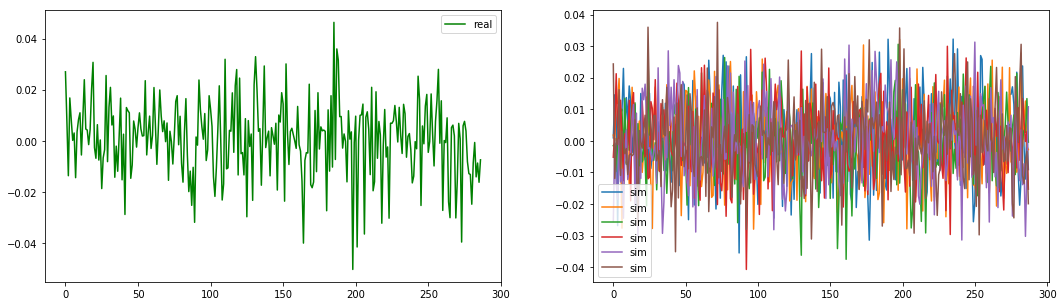

In [64]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(18,5))
plt.subplot(121)
plt.plot(r.values,'g',label='real')
plt.legend()
plt.subplot(122)
plt.plot(r_sim,label='sim')
#plt.title("Series de los rendimientos de precios del petroleo  West Texas Intemediate (WTI)", fontsize = 14)
plt.legend()
plt.show()

<p style='text-align: justify;'><Strong>Figura 4:</Strong> Rendimientos de precios del petroleo  West Texas Intemediate (WTI) (izquierda) y rendimientos de precios simulados mediante el proceso de difusión con saltos (derecha) por un periodo que va del 9 octubre 2017 al 9 noviembre 2018.

<p style='text-align: justify;'> En la fiura 4 (izquierda) se puede observar como existen algunos momentos del tiempo en donde el activo subyacente salta. Sin embargo cuando se simulan los rendimientos de los precios mediante el proceso de difusión con saltos es mas notable la aparición de los saltos  (derecha), se podria decir que este último es una representación mas real de como se comportarian los rendimientos del petróleo WTI en un cierto periodo permitiendo valorar el riesgo asociado a estos, crear estrategias  más eficientes o en el caso de la valuación de una opcion sobre este activo hace que los resultados sean más realistas, puesto que consideran los posibles acontecimientos en el mercado, es decir, actos que ocasionan que el precio de los activos suban o bajen durante la duración de la opción, y deja de lado el supuesto de que los precios permanecen constantes.        

<p style='text-align: justify;'> Ahora se analiza la serie real de los rendimientos del petroleo WTI en el periodo anteriormente mencionado con 6 simulaciones de la trayectoria de la serie con el proceso de difuión con saltos.

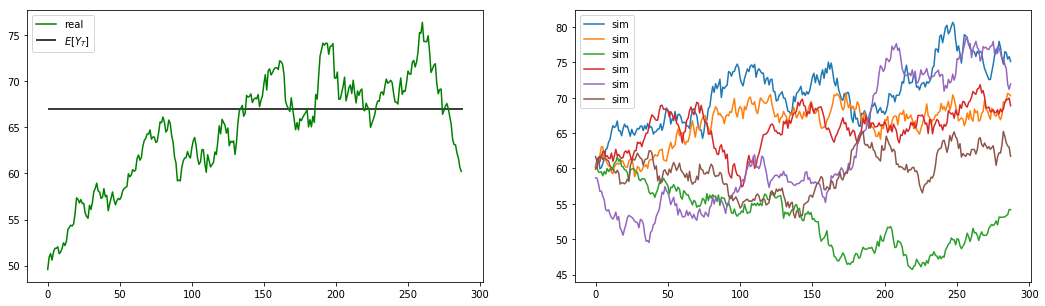

In [65]:
import warnings
s = np.exp(np.log(r_sim+1).cumsum(axis=0))
warnings.filterwarnings('ignore')
plt.figure(figsize=(18,5))
plt.subplot(121)
plt.plot(df.values,'g',label='real')
plt.hlines(s[-1,:].mean()*s0,0,steps,label='$E[Y_T]$')
plt.legend()
plt.subplot(122)
s = np.exp(np.log(r_sim+1).cumsum(axis=0))
plt.plot(s0*s,label='sim')
plt.legend()
plt.show()

<p style='text-align: justify;'><Strong>Figura 5:</Strong>  Rendimientos de precios del petroleo  West Texas Intemediate (WTI) asi como el valor esperado de $Y_T$ (izquierda) y series simuladas (derecha) por un periodo que va del 9 octubre 2017 al 9 noviembre 2018.

___
### <Strong> <font color = skyblue> VIII. Conclusiones </Strong>

<p style='text-align: justify;'>En este proyecto se ha expuesto un modelo de difusión con saltos que siguen una distribución de error generalizada asimétrica, que puede servir como herramienta para modelar la asimetría y curtosis de los precios de activos ﬁnancieros. También se ha mostrado una metodología para aproximar numéricamente la densidad y se ha probado esta metodología con datos simulados observando buenos resultados. Como resultado se creó un algoritmo en Python para simular modelos de difusión con saltos y aproximar la verosimilitud del proceso asumiendo la aproximación Bernoulli-Poisson. Respecto al problema de optimización de la log-verosimilitud, nos hemos dado cuenta que no es un problema sencillo y que se requiere de técnicas de optimización avanzadas. Para resaltar, están los resultados obtenidos con la evolución diferencial. Estos algoritmos, aunque computacionalmente son costosos, tienen un desempeño superior respecto a los métodos convencionales. 

<p style='text-align: justify;'>En los últimos años, la ingeniería financiera ha experimentado cambios profundos en la forma de diseñar portafolios que combinan activos con sus derivados. Estos cambios han propuesto nuevos paradigmas que resaltan la necesidad de administrar diferentes riesgos financieros. Estos paradigmas, en general, han abierto nuevos horizontes a la teoría y, consecuentemente, al empleo de herramientas más sofisticadas que permitan una mayor comprensión de los fenómenos financieros que presentan discontinuidades de naturaleza estocástica. En este trabajo comprobamosque el modelo de difusión con saltos  es una buena herramienta para capturar eventos extremos siendo de gran utilidad para la evaluación de riesgo de mercado, pemitiendo tener estrategias mas eficientes.


___
### <Strong> <font color = skyblue> IX. Referencias </Strong>

<p style='text-align: justify;'>Ardia, D., Ospina, J. and Giraldo, G. (2010). Jump-Diffusion Calibration using Differential Evolution. [ebook] pp.1,2. Available at: https://mpra.ub.uni-muenchen.de/27852/ [Accessed 8 Nov. 2018].

Cartea, Á, Jaimungal, S., & Penalva, J. (2015). Algorithmic and High-Frecuency Trading. Cambridge: Cambridge University Press.